### Μηχανική Μάθηση 
#### 2η ατομική εργασία 
ΣΗΜΜΥ- ΕΜΠ - 7ο εξάμηνο -Ακ. Έτος 2022-23



# ⚠️
`Επισημαίνεται ότι απαγορεύεται η ανάρτηση των λύσεων των εργαστηριακών ασκήσεων στο github, ή σε άλλες ιστοσελίδες. Η σχεδίαση και το περιεχόμενο των εργαστηριακών projects αποτελούν αντικείμενο πνευματικής ιδιοκτησίας της διδακτικής ομάδας του μαθήματος.`

### Εισαγωγή
Στην άσκηση αυτή θα χρησιμοποιήσετε τη μέθοδο συσταδοποίηση k-means, καθώς και την μέθοδο μείωσης διαστατικότητας PCA σε υπερφασματική εικόνα. 

Ονοματεπώνυμο φοιτητή: Αναστασία Χριστίνα Λίβα

Α.Μ.: 03119029

### 1. Φόρτωση υπερφασματικής εικόνας

Κατεβάστε την υπερφασματική εικόνα [`salinas_image.npy`](https://drive.google.com/file/d/1NaVn4BpaGmyN3UJOQhTGgMlfznnKhWdD/view?usp=share_link) και τις αντίστοιχες επισημειώσεις [`salinas_labels.npy`](https://drive.google.com/file/d/1u05ZSU8ptz9ZWCi4WuenqG8KuAh981LZ/view?usp=share_link).

1.α. Φορτώστε την εικόνα με χρήση της συνάρτησης numpy.load

In [25]:
import numpy as np
from google.colab import drive

drive.mount('/content/drive')
image = np.load('/content/drive/My Drive/salinas_image.npy')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1.β. Χρησιμοποιώντας την ίδια συνάρτηση, φορτώστε τις αντίστοιχες επισημειώσεις ανά πίξελ εικόνας `salinas_labels.npy`. Οι επισημειώσεις αυτές αντιστοιχούν κάθε πιξελ της υπερφασματικής εικόνας σε ένα τύπο από 16 διαφορετικές καλλιέργειες (η επισημείωση 0 αντιστοιχεί σε "Undefined"):
```python
crop_type = ["Undefined", "Brocoli_green_weeds_1", "Brocoli_green_weeds_2", "Fallow","Fallow_rough_plow", "Fallow_smooth", "Stubble","Celery", "Grapes_untrained","Soil_vinyard_develop","Corn_senesced_green_weeds","Lettuce_romaine_4wk", "Lettuce_romaine_5wk",
        "Lettuce_romaine_6wk", "Lettuce_romaine_7wk", "Vinyard_untrained", "Vinyard_vertical_trellis"]

        
```

In [26]:
labels=np.load('/content/drive/My Drive/salinas_labels.npy')

### 2. Οπτικοποίηση και Διερευνητική ανάλυση δεδομένων 

Παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. Βρείτε το ύψος και το πλάτος της εικόνας, καθώς και τον αριθμό των υπερφασματικών καναλιών

2β. Σχεδιάστε με χρήση της matplotlib το 3ο, 65ο, και 155ο κανάλι της εικόνας

2γ. Υπολογίστε τον αριθμό των διαφορετικών κατηγοριών καλλιέργειας στις επισημειώσεις

2δ. Σχεδιάστε με χρήση της matplotlib τις επισημειώσεις. Προσθέστε επιπλέον επεξηγηματική λεζάντα με χρήση της βιβλιοθήκης κάθε επισημείωσης (χρησιμοποιήστε τη λίστα `crop_type` που σας δόθηκε προηγουμένως.

2ε. Υπολογίστε πόσα pixel της εικόνας αντιστοιχούν σε κάθε τύπο καλλιέργειας

In [27]:


height, width, chnumber=image.shape
print("width =", width)
print("height =", height)
print("kanalia = ", chnumber)


width = 217
height = 512
kanalia =  204


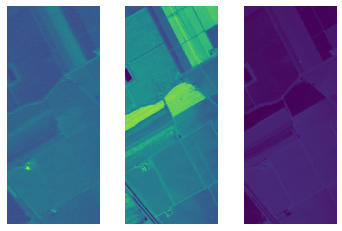

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#imgplot = plt.imshow(image)
fig, ax = plt.subplots(1, 3)
ax = ax.reshape(-1)
imgs = [image[:,:,2], image[:,:,64], image[:,:,154]]
for i, im in enumerate(imgs):
   ax[i].imshow(im)
   ax[i].axis("off")
plt.show()


In [29]:
labels.shape
len(np.unique(labels))


17

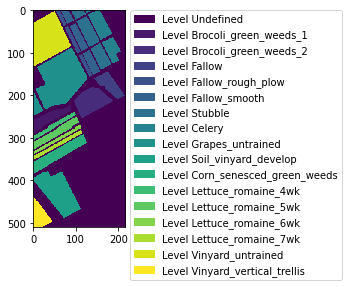

In [30]:
import matplotlib.patches as mpatches
values=["Undefined", "Brocoli_green_weeds_1", "Brocoli_green_weeds_2", "Fallow","Fallow_rough_plow", "Fallow_smooth", "Stubble","Celery", "Grapes_untrained","Soil_vinyard_develop","Corn_senesced_green_weeds","Lettuce_romaine_4wk", "Lettuce_romaine_5wk",
        "Lettuce_romaine_6wk", "Lettuce_romaine_7wk", "Vinyard_untrained", "Vinyard_vertical_trellis"]

plt.imshow(labels)
a = np.unique(labels)
im = plt.imshow(labels, interpolation='none')
colors = [ im.cmap(im.norm(value)) for value in a]
patches = [ mpatches.Patch(color=colors[i], label="Level {l}".format(l=values[i]) ) for i in range(len(values)) ]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )


In [31]:
a, b = np.unique(labels, return_counts=True)
print(a, b)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] [56975  2009  3726  1976  1394  2678  3959  3579 11271  6203  3278  1068
  1927   916  1070  7268  1807]


### 3. Εύρεση φασματικών υπογραφών

3.α. Μετατρέψτε την υπερφασματική εικόνα και τις επισημειώσεις σε μορφή κατάλληλη για περαιτέρω επεξεργασία. Η εικόνα θα πρέπει να μετατραπεί σε πίνακα N x Κ, όπου Ν τα pixel και K ο αριθμός των καναλιών. Οι επισημειώσεις αντίστοιχα θα πρέπει να μετατραπούν σε διάνυσμα μήκους Ν. Στη συνέχεια, "διώχτε" όσα δεδομένα είναι επισημειωμένα ως `Undefined`. 

💡 Χρησιμοποιήστε την `numpy reshape` 

In [32]:
height, width, chnumber=image.shape
image = np.reshape(image, (width*height, chnumber))
labels = np.reshape(labels, width*height)
print(labels.shape)
x=len(labels)
list_of_zeros=[]
for i in range(x):
  if labels[i]==0:
    list_of_zeros.append(i)

   
new_label = np.delete(labels, np.where(labels == 0))

new_img= np.delete(image, list_of_zeros, axis=0)
  


print(new_img.shape)



(111104,)
(54129, 204)


3.β. Επιλέξτε ένα τυχαίο pixel της εικόνα από κάθε κατηγορία, είτε με προγραμματιστικό τρόπο, είτε χειροκίνητα.

In [33]:
import sys
#def unique(list1):
 #   x = np.array(list1)
  #  lab=np.unique(x)
#auto egine me ta mhdenika mesa
np.set_printoptions(threshold=sys.maxsize)
print(new_label)
print(labels)
len(np.unique(new_label))
lab=labels
lab=np.unique(lab)
lab=np.sort(lab)
print(lab)
x=len(new_label)



Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10

In [34]:

pixel = [0] * 17
j=1
i=0

while j<17:
  if lab[j]!=0:
    for i in range(x):
      if new_label[i]==lab[j]:
        pixel[j]=i
  j=j+1    



3.γ. Γράψτε κώδικα για να σχεδιάσετε την υπερφασματική υπογραφή των επιλεγμένων πίξελ. 

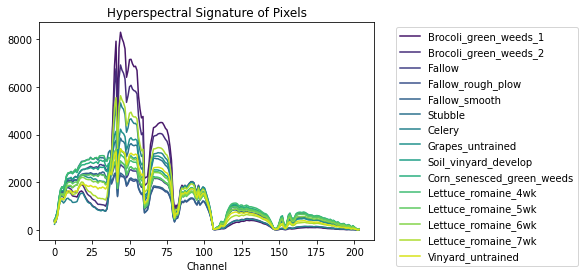

In [35]:
import matplotlib.cm as mpl

cmap=mpl.tab20
colours = [cmap(i) for i in np.linspace(0, 1, 16)]
for i in range(1,16):
  pixel_data = new_img[pixel[i], :]
  plt.plot(range(chnumber), pixel_data, color = colors[i], label=values[i])
plt.title("Hyperspectral Signature of Pixels")
plt.xlabel("Channel")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

3.δ. Επαναλάβετε την προηγούμενη διαδικασία άλλες δύο φορές, σχεδιάζοντας τα νέα διαγράμματα. 

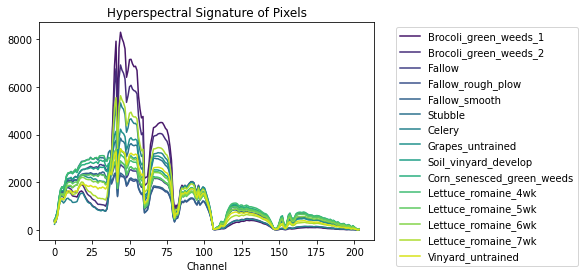

In [36]:
pixel2 = [np.random.choice(np.where(new_label == c)[0]) for c in range(1,17)]
cmap=mpl.tab20
colours = [cmap(i) for i in np.linspace(0, 1, 16)]
for i in range(1,16):
  pixel_data = new_img[pixel[i], :]
  plt.plot(range(chnumber), pixel_data, color = colors[i], label=values[i])
plt.title("Hyperspectral Signature of Pixels")
plt.xlabel("Channel")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

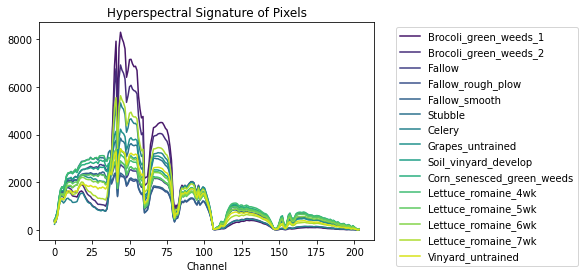

In [37]:
pixel3 = [np.random.choice(np.where(new_label == c)[0]) for c in range(1,17)]
cmap=mpl.tab20
colours = [cmap(i) for i in np.linspace(0, 1, 16)]
for i in range(1,16):
  pixel_data = new_img[pixel[i], :]
  plt.plot(range(chnumber), pixel_data, color = colors[i], label=values[i])
plt.title("Hyperspectral Signature of Pixels")
plt.xlabel("Channel")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

3.ε. Σημειώστε τις παρατηρήσεις σας και τα συμπεράσματα σας. Προσπαθήστε να απαντήσετε στις ακόλουθες ερωτήσεις:
    
* Με βάση τα προηγούμενα διαγράμματα θεωρείτε ότι κάποιες καλλιέργειες είναι πιο εύκολα διαχωρίσιμες από άλλες με βάση τη φασματική υπογραφή τους; 
* Θεωρείτε ότι όλα τα κανάλια παρέχουν χρήσιμη πληροφορία για το διαχωρισμό;

Aπό τις φασματικές υπογραφές των τυχαία επιλεγμένων pixels παρατηρώ τα εξής:

1. Η διαφοροποίηση των κατηγοριών μπορεί να γίνει βάσει της έντασης κάθε υπογραφής. Παρατηρώ πως στα τρία δείγματα είναι ξεκάθαρη η Brocoli_green_weeds_1 αφού έχει μεγαλύτερο πλάτος από τις υπόλοιπες κατηγορίες. Μπορώ επίσης να παρατηρήσω εύκολα τις stubble, fallow_smooth και lettuce_romain_6wk για μεγάλο ποσοστό καναλιών. Ο διαχωρισμός δεν είναι εύκολος για τις υπόλοιπες κατηγορίες καθώς στο μεγακύτερο μέρος των γραφημάτων οι συναρτήσεις συμπέφτουν
2. Δεν λαμβάνω χρήσιμη πληροφορία για το διαχωρισμό από όλα τα κανάλια. Για κάθε κανάλι 0-80 μπορώ να διακρίνω τις κατηγορίες άρα παίρνω αξιοποιήσιμη πληροφορία, ενώ για 80 και πάνω οι εντάσεις συμπέφτουν, οπότε δε μπορώ να διακρίνω ποια καμπύλη αντιστοιχεί που.
3. Είναι εμφανές πως οι καμπύλες των 26 κατηγοριών μοιάζουν, γεγονος το οποίο δηλώνει πως οι καμπύλες πως οι κατηγορίες είναι ομοιόμορφες οσον αφορά τις φυσικές ιδιότητές τους, ενώ έχω ίδια μέγιστα και ελάχιστα οπότε ο διαχωρισμός καθίσταται πιο δύσκολος.
4. Τα κανάλια εντός του εύρους 0-80 όπου έχω dip στην ένταση για όλα τα pixels δεν δίνουν αξιοποιήσιμη πληροφορία. Τα dips αυτά ενδεχομένως να οφείλονται σε υψηλή απορρόφηση φωτός ή σε θόρυβο ή σφάλμα στον εξοπλισμό.

3.στ. Σχεδιάστε ένα heatmap, που να δείχνει τη συσχέτιση μεταξύ των διαφορετικών καναλιών

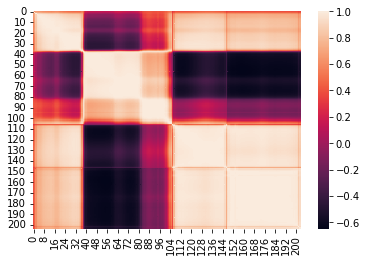

In [38]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
  
# import file with data
data= pd.DataFrame(new_img)
  
# plotting correlation heatmap
dataplot=sb.heatmap(data.corr())
  
# displaying heatmap
mp.show()


Στο εύρος 0-80 στο οποίο μπορεί να γίνει συσταδοποίηση παρατηρώ ότι για τα κανάλια στα εύρη 0-38 και 39-80 έχω μεγάλη συσχέτιση με άλλα κανάλια του ίδιου εύρους, αλλά με τα κανάλια του άλλου ζεύγους η συσχέτιση είναι μικρή. Τελικά έχω δύο κατηγορίες καναλιών (0-38) και (39-80).



### 4. Συσταδοποίηση με χρήση του αλγορίθμου KMeans

 4.α. Εφαρμόστε τον αλγόριθμο KMeans (sklearn.cluster) στα δεδομένα (εφόσον κάνατε την προεπεξεργασία του Βήματος 3). Χρησιμοποιήστε την τιμή `n_cluster=16`.

In [39]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

k = 16
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(new_img)
y_pred

array([12, 12, 12, 12,  3,  3, 12, 12,  3,  3,  3, 12, 12,  3,  3,  3,  3,
        3,  3,  3, 12,  3, 12, 12, 12,  3,  3, 12, 12, 12,  8,  5,  5,  5,
        5,  5,  5,  5,  5,  8,  8,  8,  8,  5,  5,  5,  5,  5,  8, 15, 13,
        7,  7,  7,  7,  7,  7,  7,  7,  7, 12, 12, 12, 12, 12,  3, 12, 12,
       12,  3,  3, 12, 12, 12,  3,  3,  3,  3,  3,  3,  3, 12,  3, 12, 12,
       12,  3,  3, 12, 12, 10,  5,  5,  5,  5,  5,  5,  5,  5,  8,  8,  8,
        8,  5,  5,  5,  5,  5, 13,  5,  5,  5,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7, 12, 12, 12, 12,  3, 12, 12, 12,  3,  3, 12, 12, 12,  3,
        3,  3,  3,  3,  3,  3, 12, 12,  3, 12, 12, 12,  3, 12, 12, 12,  8,
        8,  8,  5,  5,  5,  5,  8,  8,  8,  8,  8,  8,  8,  8, 10,  5,  5,
        5,  5,  5,  5,  5,  5,  7,  7,  7,  7,  7,  7,  7,  7,  7,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
       12, 12, 12, 12, 12, 12, 12, 12, 12,  3,  3, 12, 12,  3,  3,  3,  3,
        3,  3,  3, 12, 12

4.β. Υπολογίστε τις ακόλουθες μετρικές των προβλέψεων του αλγορίθμου

* Accuracy Score
* Rand Score
* Silhouette Score 

Σημειώστε ότι για τη συνάρτηση rand_score μπορείτε να δώσετε σαν είσοδο τα αρχικά labels που σας δόθηκαν μαζί με τα predicted. Για τον υπολογισμό όμως του accuracy, θα πρέπει να αντιστοιχήσουμε τα διαφορετικά ID των cluster στην έξοδο του KMeans, με τις κατηγορίες της αρχικής επισημείωσης. Για την μετατροπή αυτή μπορείτε να χρησιμοποιήσετε την ακόλουθη συνάρτηση που σας δίνεται `translate_predicted_labels`.

In [40]:
!pip install munkres
from munkres import Munkres

def make_cost_matrix(c1, c2):
    """
    """
    uc1 = np.unique(c1)
    uc2 = np.unique(c2)
    l1 = uc1.size
    l2 = uc2.size
    assert(l1 == l2 and np.all(uc1 == uc2))

    m = np.ones([l1, l2])
    for i in range(l1):
        it_i = np.nonzero(c1 == uc1[i])[0]
        for j in range(l2):
            it_j = np.nonzero(c2 == uc2[j])[0]
            m_ij = np.intersect1d(it_j, it_i)
            m[i,j] =  -m_ij.size
    return m

def translate_clustering(clt, mapper):
    return np.array([ mapper[i] for i in clt ])

def accuracy(cm):
    """computes accuracy from confusion matrix"""
    return np.trace(cm, dtype=float) / np.sum(cm)


def translate_predicted_labels(predicted_y, y):
    cost_matrix = make_cost_matrix(predicted_y, y)
    m = Munkres()
    indexes = m.compute(cost_matrix)
    mapper = { old: new for (old, new) in indexes }

    for old, new in mapper.items():
        print("map: %s --> %s" %(old, new))

    translated_predicted_y = translate_clustering(predicted_y, mapper)
    return translated_predicted_y

# usage:
# translate_predicted_labels(predicted, gt)
# predicted: N, array of predicted labels (predicted cluster IDs)
# gt: N, array of ground truth classes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
from sklearn.metrics import accuracy_score   
from sklearn.metrics import rand_score   
from sklearn.metrics import silhouette_score


new_label = new_label - 1
translated_labels = translate_predicted_labels(y_pred, new_label)
score = accuracy_score(new_label, translated_labels)
print(score)
rscore=rand_score(new_label, y_pred)
print(rscore)
silscore=silhouette_score(new_img, kmeans.labels_)
print(silscore)

map: 0 --> 7
map: 1 --> 1
map: 2 --> 8
map: 3 --> 5
map: 4 --> 4
map: 5 --> 6
map: 6 --> 9
map: 7 --> 3
map: 8 --> 2
map: 9 --> 12
map: 10 --> 13
map: 11 --> 0
map: 12 --> 10
map: 13 --> 14
map: 14 --> 11
map: 15 --> 15
0.5817768663747713
0.9054169776881031
0.43844628061544594


4.δ. Σχεδιάστε το confusion matrix (χρησιμοποιήστε τα αντιστοιχησμένα predicted labels).

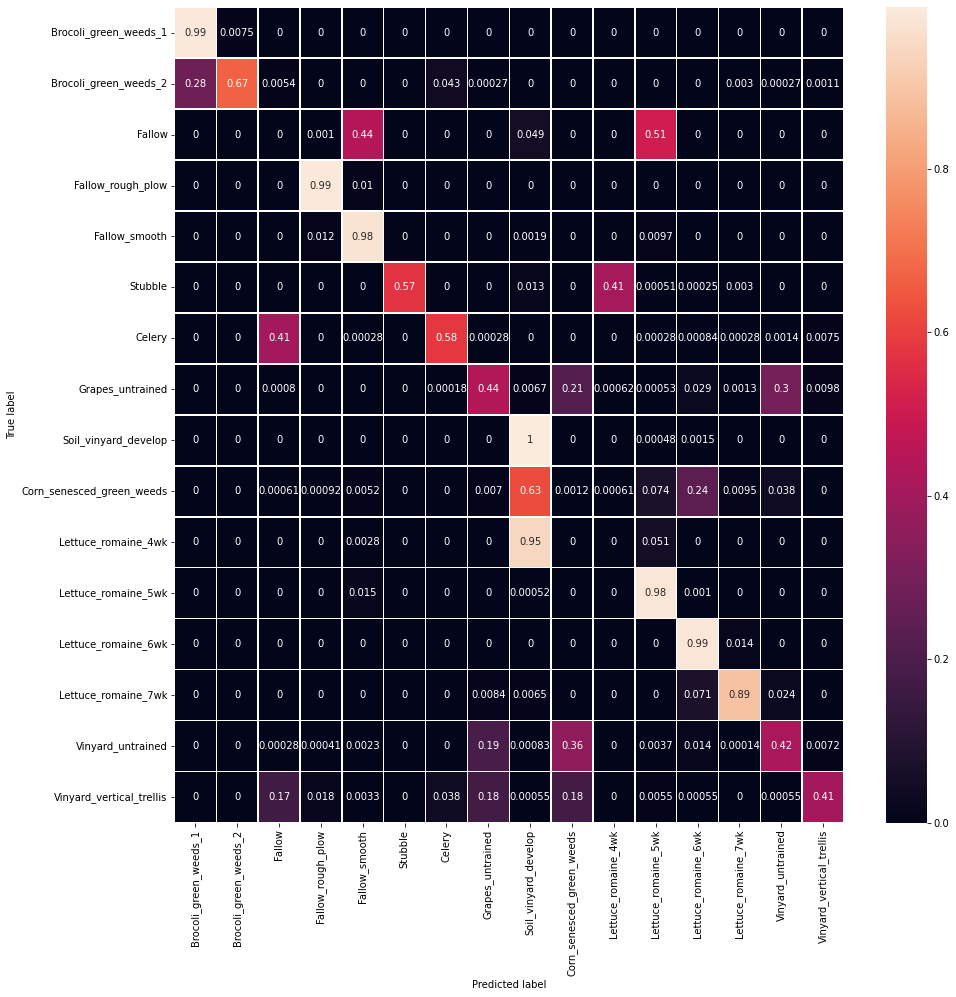

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

conf_matrix = confusion_matrix(new_label, translated_labels)
conf_matrix=conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sb.heatmap(conf_matrix, annot=True,linewidths=.5, ax=ax, xticklabels=values[1:], yticklabels=values[1:])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### 5. Μείωση διαστατικότητας δεδομένων

5.α. Εφαρμόστε στα δεδομένα τη μέθοδο μείωσης διαστατικότητας PCA. Επιλέξτε `n_components=3`

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
img2=pca.fit_transform(new_img)
img2

array([[ 1.78306270e+03,  7.94689335e+03, -1.43363811e+03],
       [ 1.43380174e+03,  7.52122995e+03, -1.36847323e+03],
       [ 1.28790335e+03,  7.41008420e+03, -1.32767390e+03],
       [ 2.26082496e+03,  8.40875313e+03, -1.52087166e+03],
       [ 2.69998504e+03,  8.99578825e+03, -1.56468972e+03],
       [ 3.20860343e+03,  9.44991337e+03, -1.59368817e+03],
       [ 5.26246929e+02,  6.85337393e+03, -9.87185361e+02],
       [ 1.96735842e+03,  7.97538907e+03, -1.24778849e+03],
       [ 2.79036383e+03,  8.92181945e+03, -1.43436702e+03],
       [ 3.27552784e+03,  9.38389386e+03, -1.55110094e+03],
       [ 2.89614844e+03,  8.89739433e+03, -1.50534523e+03],
       [ 1.99871100e+03,  8.13511582e+03, -1.37596599e+03],
       [ 1.74553418e+03,  8.04553659e+03, -1.26799594e+03],
       [ 3.91809624e+03,  1.02548092e+04, -1.69165749e+03],
       [ 3.97306046e+03,  1.04879088e+04, -1.67294697e+03],
       [ 3.68149915e+03,  1.02841432e+04, -1.51441558e+03],
       [ 4.21753797e+03,  1.09399896e+04

5.β. Τι ποσοστό της διακύμανσης των δεδομένων διατηρείτε με `n_components=3` ?
Hint: sklearn.decomposition.PCA.explained_variance_ratio_

In [44]:
pca.explained_variance_ratio_

array([0.75418456, 0.22926902, 0.01123053])

In [45]:
1 - pca.explained_variance_ratio_.sum() 

0.005315898287056919

### 6. Συνδυασμός μείωσης διαστατικότητας και kmeans

6.α. Εφαρμόστε τον αλγόριθμο kmeans στα δεδομένα μειωμένης διαστατικότητας `n_components=3`, και υπολογίστε εκ νέου τις μετρικές του Βήματος 4.γ.

In [46]:

y_pred2 = kmeans.fit_predict(img2)
y_pred
translated_labels = translate_predicted_labels(y_pred2, new_label)
score = accuracy_score(new_label, translated_labels)
print(score)
rscore=rand_score(new_label, y_pred2)
print(rscore)
silscore=silhouette_score(img2, kmeans.labels_)
print(silscore)

map: 0 --> 9
map: 1 --> 6
map: 2 --> 15
map: 3 --> 5
map: 4 --> 0
map: 5 --> 3
map: 6 --> 8
map: 7 --> 4
map: 8 --> 13
map: 9 --> 7
map: 10 --> 2
map: 11 --> 14
map: 12 --> 12
map: 13 --> 10
map: 14 --> 11
map: 15 --> 1
0.6283323172421438
0.9110608348072841
0.45152127993931485


6.β. Δοκιμάστε διαφορετικές τιμές για το `n_components` (από 1 έως 10) και τρέχτε εκ νέου κάθε φορα τον k-means, υπολογίζοντας τα τελικά score. Για κάθε μετρική, φτιάχτε ένα διάγραμμα που στον άξονα των Χ θα έχει τον αριθμό `n_components` και στον άξονα των Υ, την τιμή της μετρικής. Τι συμπεράσματα βγάζετε; 

map: 0 --> 6
map: 1 --> 9
map: 2 --> 15
map: 3 --> 0
map: 4 --> 4
map: 5 --> 14
map: 6 --> 5
map: 7 --> 1
map: 8 --> 10
map: 9 --> 8
map: 10 --> 3
map: 11 --> 7
map: 12 --> 13
map: 13 --> 12
map: 14 --> 2
map: 15 --> 11
map: 0 --> 5
map: 1 --> 9
map: 2 --> 6
map: 3 --> 8
map: 4 --> 0
map: 5 --> 15
map: 6 --> 4
map: 7 --> 7
map: 8 --> 14
map: 9 --> 3
map: 10 --> 1
map: 11 --> 11
map: 12 --> 2
map: 13 --> 12
map: 14 --> 10
map: 15 --> 13
map: 0 --> 9
map: 1 --> 6
map: 2 --> 15
map: 3 --> 5
map: 4 --> 0
map: 5 --> 3
map: 6 --> 8
map: 7 --> 4
map: 8 --> 13
map: 9 --> 7
map: 10 --> 2
map: 11 --> 14
map: 12 --> 12
map: 13 --> 10
map: 14 --> 11
map: 15 --> 1
map: 0 --> 7
map: 1 --> 6
map: 2 --> 9
map: 3 --> 5
map: 4 --> 4
map: 5 --> 0
map: 6 --> 15
map: 7 --> 11
map: 8 --> 3
map: 9 --> 12
map: 10 --> 14
map: 11 --> 1
map: 12 --> 8
map: 13 --> 13
map: 14 --> 2
map: 15 --> 10
map: 0 --> 8
map: 1 --> 1
map: 2 --> 7
map: 3 --> 10
map: 4 --> 4
map: 5 --> 2
map: 6 --> 0
map: 7 --> 3
map: 8 --> 15
m

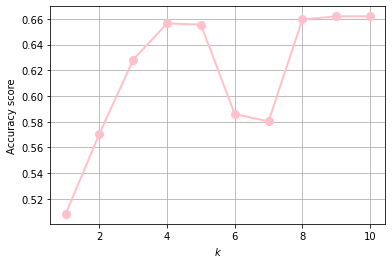

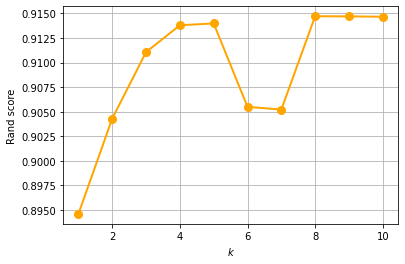

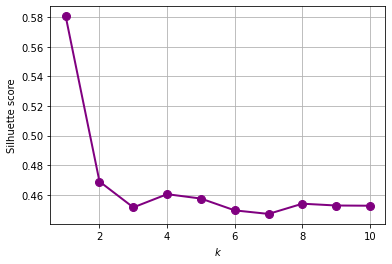

In [50]:
acscore=[]
r_score=[]
sil_score=[]
for i in range (1,11):

  pca = PCA(n_components=i)
  img2=pca.fit_transform(new_img)
  img2
  y_pred2 = kmeans.fit_predict(img2)
  translated_labels = translate_predicted_labels(y_pred2, new_label)
  score = accuracy_score(new_label, translated_labels)
  rscore=rand_score(new_label, y_pred2)
  silscore=silhouette_score(img2, kmeans.labels_)
  acscore.append(score)
  r_score.append(rscore)
  sil_score.append(silscore)


print(acscore)
print(r_score)
print(sil_score)
score=[acscore[0] for i in acscore]
x = [1,2,3,4,5,6,7,8,9,10]
plt.plot(x, acscore, linestyle='-', color='pink', linewidth=2)
plt.plot(x, acscore, 'bo', markersize=8, color='pink')
plt.grid()
plt.xlabel("$n_components$")
plt.ylabel("Accuracy score")
plt.show()


plt.plot(x, r_score, linestyle='-', color='orange', linewidth=2)
plt.plot(x, r_score, 'bo', markersize=8, color='orange')
plt.grid()
plt.xlabel("$n_components$")
plt.ylabel("Rand score")
plt.show()


plt.plot(x, sil_score, linestyle='-', color='purple', linewidth=2)
plt.plot(x, sil_score, 'bo', markersize=8, color='purple')
plt.grid()
plt.xlabel("$n_components$")
plt.ylabel("Silhuette score")
plt.show()


Για n_components=8, 9, 10 έχω βέλτιστα accuracy και rand scores, ενώ για n_components=4,5 έχω λίγο χειρότερα αποτελέσματα. όσον αφορά το Silhuette score η υψηλότερή μου τιμή είναι για n_components=1, ενώ για τις υπόλοιπες τιμές των components λαμβάνω παρόμοια αποτελέσματα που κυμαίνονται ανάμεσα στο 0,45 και στο 0,47, γεγονός το οποίο μάλλον οφείλεται στο ότι μειώνοντας τη διαστατικότητα σε ένα έχω ελαχιστοποίηση του θορύβου οπότε ο αλγόριθμος πρόβλεψης kmeans αποδίδει καλά. Αυτό συμπίπτει και με τις προηγούμενες παρατηρήσεις μου αφού είδα πως αρκετό ποσοστό των καναλιών δε συνεισφέρει στη συσταδιοποίηση οπότε η μείωση της πληροφορίας δεν επηρεάζει πολύ τις πορβλέψεις μου.

Βάσει των παρατηρήσεων αυτών θεωρώντας στόχο μου την παραγωγή συστάδων που προσωμοιάζουν τις πραγματικές επιλέγω n_components=4, ενώ εάν στόχος μου είναι το clustering χωρίς να έχω απαραίτητη ανταπόκριση με τις πραγματικές ομάδες μπορώ να επιλέξω n_components = 1.

